In [4]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(-1, 1)

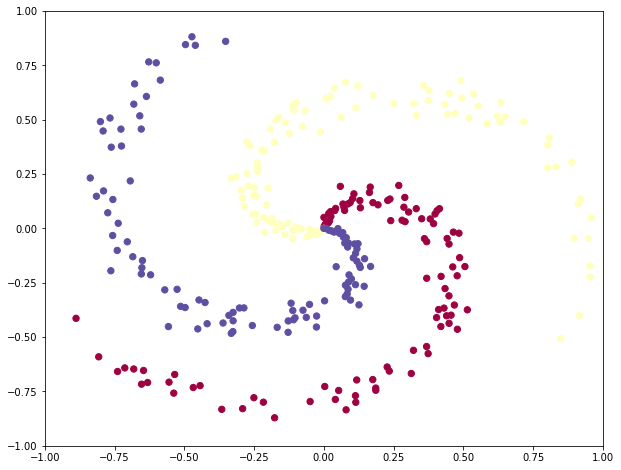

In [5]:
np.random.seed(0)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
#fig.savefig('spiral_raw.png')

In [13]:
h =100 #number of neurons
W = 0.01*np.random.randn(D,h) #(2,100)
b = np.zeros((1,h)) #(1,100)

W2 = 0.01*np.random.randn(h,K) #(100,3)
b2 = np.zeros((1,K))  #(1,3)

step_size = 1e-0 #learning rate
reg = 1e-3

num_examples = X.shape[0]  #300

for i in range(10000):
    #FORWARD PROPAGATION
    # X(300,2)
    #(1)Calculate class score
    hidden_layer = np.maximum(0,np.dot(X,W)+b) #(300,100)
    scores = np.dot(hidden_layer,W2)+b2  #(300,3)
    
    #(2)Calculate class probabilities (softmax)
    exp_scores = np.exp(scores)  #(300,3)
    probs = exp_scores/np.sum(exp_scores,axis=1,keepdims=True) #(300,3)
    
    #(3)Calculate loss
    correct_logprobs = -np.log(probs[range(num_examples),y])  #(300,1)
    data_loss = np.sum(correct_logprobs)/num_examples
    
    #(4)Regularization
    reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
    loss = data_loss + reg_loss
    if i%1000 == 0:
        print(f"iter {i}: loss {loss}")
    
    #BACK PROPAGATION
    
    #(1) Find the gradient of loss
    dscores = probs
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples  #(300,3)
    
    
    #(2) Backprp into W2, b2 
    dW2 = np.dot(hidden_layer.T,dscores) #(100,3)
    db2 = np.sum(dscores,axis=0,keepdims=True) #(1,3)
    
    #(3a) Backprop hidden layer
    dhidden = np.dot(dscores,W2.T) #(300,100)
    dhidden[hidden_layer <= 0] = 0   #undo relu in backprop
    
    #(3b) Backprop W,b
    dW = np.dot(X.T, dhidden) #(2,100)
    db = np.sum(dhidden,axis=0, keepdims = True) #(1,100)
    
    dW2 += reg*W2
    dW += reg*W
    
    W -= step_size*dW
    b -= step_size*db
    W2 -= step_size*dW2
    b2 -= step_size*db2
    
    
    



iter 0: loss 1.0986917391908977
iter 1000: loss 0.27989488457513684
iter 2000: loss 0.24922000504869474
iter 3000: loss 0.24579625424791401
iter 4000: loss 0.24518646419107049
iter 5000: loss 0.2449090533535782
iter 6000: loss 0.24473617179980545
iter 7000: loss 0.24463669573638583
iter 8000: loss 0.24457286436185813
iter 9000: loss 0.24451762122291146


In [14]:
hidden_layer = np.maximum(0,np.dot(X,W)+b)
scores = np.dot(hidden_layer,W2)+b2
predicted_class = np.argmax(scores, axis=1)
np.mean(predicted_class == y)*100

98.66666666666667

(-1.8712034092398278, 1.8687965907601756)

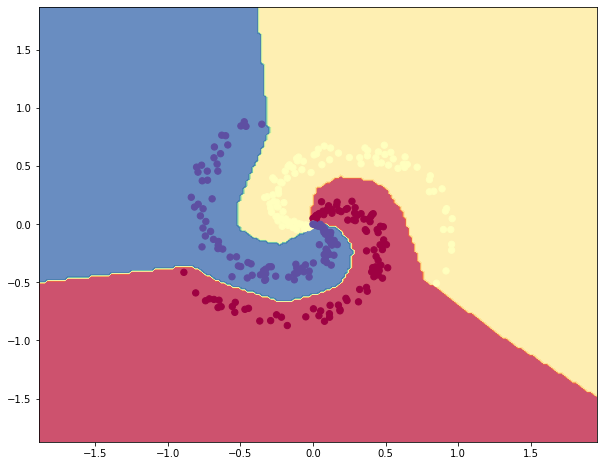

In [15]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_net.png')